In [1]:
import torch
import torch.nn.functional as F
from sklearn.datasets import make_blobs
from torch import nn, optim

import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = torch.tensor([1,2,3]).float()
y = torch.tensor([1,2.2,3.4]).float()

w = 2
cost = torch.mean((w*x - y) **2)
print(cost)

w = 1
cost = torch.mean((w*x - y) **2)
print(cost)

w = 1.1
cost = torch.mean((w*x - y) **2)
print(cost)

print(((w*x - y) **2).mean())

tensor(3.6667)
tensor(0.0667)
tensor(0.0067)
tensor(0.0067)


[tensor(576.4667), tensor(477.4000), tensor(387.6667), tensor(307.2667), tensor(236.2000), tensor(174.4667), tensor(122.0667), tensor(79.), tensor(45.2667), tensor(20.8667), tensor(5.8000), tensor(0.0667), tensor(3.6667), tensor(16.6000), tensor(38.8667), tensor(70.4667), tensor(111.4000), tensor(161.6667), tensor(221.2667), tensor(290.2000)]


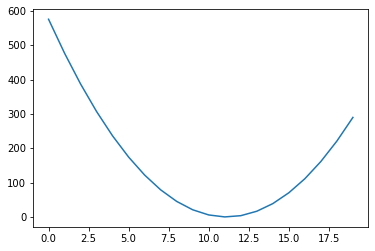

In [6]:
c = []
for w  in range(-10, 10) :
    cost = ((w*x - y) **2).mean()
    c.append(cost)
print(c)

plt.plot(c)

In [10]:
w = -60    # 1.114
alpha = 0.1

d =  ((w*x-y)*x).mean()
w = w - alpha * d
print(d, w)

tensor(-285.2000) tensor(-31.4800)


In [11]:
d = ((w*x-y)*x).mean()
w = w - alpha * d
print(d, w)

tensor(-152.1067) tensor(-16.2693)


In [16]:
x = torch.tensor([1,2,3]).float()
y = torch.tensor([1,2.2,3.4]).float()

w = -500000
alpha = 0.1

for i in range(100) :
  d = ((w*x-y)*x).mean()
  w = w - alpha * d
  print(d, w)

tensor(-2333338.5000) tensor(-266666.1250)
tensor(-1244447.1250) tensor(-142221.4062)
tensor(-663705.0625) tensor(-75850.8984)
tensor(-353976.0312) tensor(-40453.2930)
tensor(-188787.2344) tensor(-21574.5684)
tensor(-100686.5234) tensor(-11505.9160)
tensor(-53699.4727) tensor(-6135.9688)
tensor(-28639.7207) tensor(-3271.9966)
tensor(-15274.5186) tensor(-1744.5447)
tensor(-8146.4082) tensor(-929.9039)
tensor(-4344.7515) tensor(-495.4287)
tensor(-2317.2007) tensor(-263.7086)
tensor(-1235.8402) tensor(-140.1246)
tensor(-659.1148) tensor(-74.2131)
tensor(-351.5279) tensor(-39.0603)
tensor(-187.4816) tensor(-20.3122)
tensor(-99.9902) tensor(-10.3132)
tensor(-53.3281) tensor(-4.9804)
tensor(-28.4416) tensor(-2.1362)
tensor(-15.1689) tensor(-0.6193)
tensor(-8.0901) tensor(0.1897)
tensor(-4.3147) tensor(0.6212)
tensor(-2.3012) tensor(0.8513)
tensor(-1.2273) tensor(0.9740)
tensor(-0.6546) tensor(1.0395)
tensor(-0.3491) tensor(1.0744)
tensor(-0.1862) tensor(1.0930)
tensor(-0.0993) tensor(1.1029)

tensor(1.6780) tensor(1.9638)


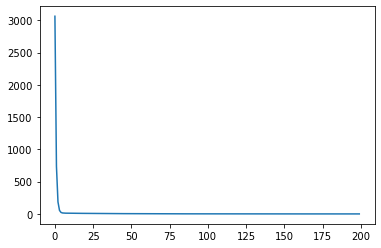

In [19]:
x = torch.tensor([1, 2, 3]).float()
y = torch.tensor([3.1, 5.5, 7.1]).float()   # y = 2x + 1

w = -50
b = 0
alpha = 0.1

costs = []
for i in range(200) :
    d = ((w*x + b - y)*x).mean()    #cost/dw
    w = w - alpha * d                     

    d_b = ((w*x + b - y)).mean()    #cost/db
    b = b - alpha * d_b    

    cost =  ((w*x + b - y)**2).mean()
    costs.append(cost)
print(w, b ) 

plt.plot(costs)

# pytorch 미분

In [799]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x+ 2)
y.backward( torch.ones_like(x)   )
x.grad

tensor([4., 4., 4., 4., 4.])

In [790]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x + 6).sum()
y.backward()
x.grad

tensor([4., 4., 4., 4., 4.])

In [800]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x**2 + 2*x).sum()
y.backward()
x.grad 

tensor([10., 18., 26., 34., 42.])

In [801]:
8*x + 2 == x.grad

tensor([True, True, True, True, True])

In [808]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (2*x + 4)
z = (y * 4).sum()
z.backward()
x.grad

tensor([8., 8., 8., 8., 8.])

In [810]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (2*x + 4)
z = (y**2).sum()
z.backward()
x.grad

tensor([24., 32., 40., 48., 56.])

In [816]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (2*x + 4)
y.retain_grad()
z = (y**2).sum()
z.backward()
print(x.grad)
print(y.grad)    #    1,2,3   6,8,10      dz/dy=2y  ->  12, 16, 20

tensor([24., 32., 40., 48., 56.])
tensor([12., 16., 20., 24., 28.])


# pyroch 미분을 이용한 경사 하강법

In [788]:
# 데이터
x_train = torch.tensor([1, 2, 3]).float()
y_train = torch.tensor([2, 4, 6]).float()
#x_train = torch.tensor([[1], [2], [3]])
#y_train = torch.tensor([[2], [4], [6]])

# 모델 초기화
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w, b], lr=0.1)

epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(epochs):

    # H(x) 계산
    hypothesis = x_train * w + b

    # cost 계산
    #cost = torch.mean((hypothesis - y_train) ** 2)
    #cost = F.mse_loss(hypothesis, y_train)
    cost_fn= nn.MSELoss()
    cost = cost_fn(hypothesis, y_train)   
    
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 1.867, b: 0.800 Cost: 18.666666
Epoch  100/1999 W: 1.972, b: 0.063 Cost: 0.000600
Epoch  200/1999 W: 1.998, b: 0.006 Cost: 0.000005
Epoch  300/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  400/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  500/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  600/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  700/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  800/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch  900/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1000/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1100/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1200/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1300/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1400/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1500/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1600/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1700/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1800/1999 W: 2.000, b: 0.000 Cost: 0.000000
Epoch 1900/1999 W: 2.000, b: 0.000 Cost: 0.000000

# regression

In [689]:
X = torch.tensor([[1],
              [2],
              [3],
              [4]]).float()

y = torch.tensor([[2.0],  [4],       [6],   [8]]).float()


layer = torch.nn.Linear(1, 1)

optimizer = optim.SGD(layer.parameters() , lr=0.01)

epochs = 4000
for epoch in range(epochs):
    
    hypothesis = layer(X)

    #cost = torch.mean((hypothesis - y) ** 2)    
    #cost = F.mse_loss(hypothesis, y)
    cost_fn= nn.MSELoss()
    cost = cost_fn(hypothesis, y)   
    

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')
        
w, b= layer.parameters()
print(w, b)

print(layer(X))

epoch = 1    cost=61.24171447753906
epoch = 101    cost=0.02994280681014061
epoch = 201    cost=0.016438240185379982
epoch = 301    cost=0.009024377912282944
epoch = 401    cost=0.004954280331730843
epoch = 501    cost=0.0027198423631489277
epoch = 601    cost=0.0014931568875908852
epoch = 701    cost=0.0008197304559871554
epoch = 801    cost=0.0004500174254644662
epoch = 901    cost=0.00024705208488740027
epoch = 1001    cost=0.00013562905951403081
epoch = 1101    cost=7.445822120644152e-05
epoch = 1201    cost=4.0877959690988064e-05
epoch = 1301    cost=2.244089773739688e-05
epoch = 1401    cost=1.2319385859882459e-05
epoch = 1501    cost=6.763311375834746e-06
epoch = 1601    cost=3.713581691044965e-06
epoch = 1701    cost=2.038947059190832e-06
epoch = 1801    cost=1.1194792932656128e-06
epoch = 1901    cost=6.147678845991322e-07
epoch = 2001    cost=3.376025006218697e-07
epoch = 2101    cost=1.8548689695307985e-07
epoch = 2201    cost=1.0194339949975983e-07
epoch = 2301    cost=5.60

# logistic regression

In [726]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [1]]).float()
                  
layer = torch.nn.Linear(2, 1)

optimizer = optim.SGD(layer.parameters() , lr=0.1)

epochs = 8000
for epoch in range(epochs):
    
    hypothesis = torch.sigmoid(layer(X))    
    #cost = -torch.mean(y*torch.log(hypothesis)  + (1-y)*torch.log(1-hypothesis)   )    
    #cost = F.binary_cross_entropy(hypothesis, y)    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')
        
print(torch.sigmoid(layer(X)))

epoch = 1    cost=0.6871315240859985
epoch = 101    cost=0.3773704171180725
epoch = 201    cost=0.28931331634521484
epoch = 301    cost=0.2325238585472107
epoch = 401    cost=0.1933508813381195
epoch = 501    cost=0.1648770421743393
epoch = 601    cost=0.14332330226898193
epoch = 701    cost=0.12648709118366241
epoch = 801    cost=0.11300425231456757
epoch = 901    cost=0.10198566317558289
epoch = 1001    cost=0.0928279384970665
epoch = 1101    cost=0.08510752022266388
epoch = 1201    cost=0.07851841300725937
epoch = 1301    cost=0.07283490151166916
epoch = 1401    cost=0.06788656115531921
epoch = 1501    cost=0.06354253739118576
epoch = 1601    cost=0.059700995683670044
epoch = 1701    cost=0.05628133937716484
epoch = 1801    cost=0.05321916937828064
epoch = 1901    cost=0.050462305545806885
epoch = 2001    cost=0.04796815291047096
epoch = 2101    cost=0.04570154473185539
epoch = 2201    cost=0.04363333061337471
epoch = 2301    cost=0.04173898324370384
epoch = 2401    cost=0.039997816

In [728]:
predict = torch.sigmoid(layer(X))  > 0.5
(predict == y).float().mean()

tensor(1.)

# Softmax

tensor([0.1429, 0.2857, 0.5714])


<ipython-input-684-41a13c8a4f43>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(n_p)


([<matplotlib.patches.Wedge at 0x1dfa1190640>,
 [Text(0.9910657674599295, 0.4772720865178073, ''),
  Text(-0.24477291260077555, 1.0724207295912054, ''),
  Text(-0.2447733142298589, -1.072420637921954, '')])

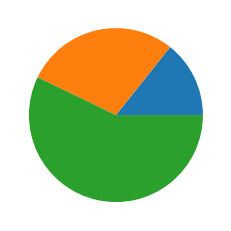

In [684]:
%matplotlib inline
p = torch.tensor([1.2, 2.4, 4.8]).float()

n_p = p / torch.sum(p)
print(n_p)

torch.max(n_p), torch.argmax(n_p)
plt.pie(n_p)

tensor([0.0244, 0.0811, 0.8944])


([<matplotlib.patches.Wedge at 0x1dfa2c988b0>,
 [Text(1.096759495524473, 0.08437184943393954, ''),
  Text(1.0095055928904035, 0.43691928078650294, ''),
  Text(-1.0400441414706938, -0.35820131740752664, '')])

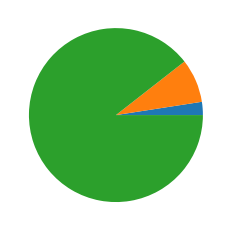

In [685]:
#
n_sm = torch.exp(p) / torch.sum( torch.exp(p))
print(n_sm)
plt.pie(n_sm)

[2 2 2 1 0 2 0 2 0 0 1 1 0 1 1]
['yellow', 'yellow', 'yellow', 'red', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red']
torch.Size([15, 2]) torch.Size([15])


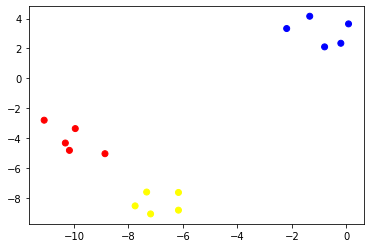

In [718]:
X, y = make_blobs(n_samples=15, n_features=2, centers=3, random_state=1)
print(y)
d = ['blue', 'red', 'yellow']
colors = [ d[i]  for i in y]
print(colors)

plt.scatter(X[:, 0], X[:, 1], color=colors)


X = torch.tensor(X).float()
y = torch.tensor(y).long()

print(X.shape, y.shape)

In [719]:
layer = torch.nn.Linear(2, 3)

optimizer = optim.SGD(layer.parameters() , lr=0.01)

epochs = 1000
for epoch in range(epochs):
    
    hypothesis = layer(X)
    cost_fn = nn.CrossEntropyLoss()    

    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')     


epoch = 1    cost=5.494870185852051
epoch = 101    cost=0.22150112688541412
epoch = 201    cost=0.1230759471654892
epoch = 301    cost=0.08763591200113297
epoch = 401    cost=0.06877084821462631
epoch = 501    cost=0.05692983791232109
epoch = 601    cost=0.04875582084059715
epoch = 701    cost=0.04274919256567955
epoch = 801    cost=0.03813524171710014
epoch = 901    cost=0.03447170928120613


In [720]:
torch.set_printoptions(precision=4, sci_mode=False)
predict = layer(X)
predict = torch.softmax(predict, axis=1)
print(predict)

tensor([[    0.0000,     0.0052,     0.9948],
        [    0.0000,     0.0716,     0.9284],
        [    0.0000,     0.0370,     0.9630],
        [    0.0003,     0.9769,     0.0228],
        [    0.9575,     0.0385,     0.0040],
        [    0.0000,     0.0110,     0.9890],
        [    0.9338,     0.0615,     0.0046],
        [    0.0000,     0.0219,     0.9781],
        [    0.9900,     0.0097,     0.0003],
        [    0.9656,     0.0342,     0.0001],
        [    0.0013,     0.9938,     0.0049],
        [    0.0004,     0.8949,     0.1047],
        [    0.9892,     0.0108,     0.0000],
        [    0.0014,     0.9978,     0.0008],
        [    0.0004,     0.9888,     0.0108]], grad_fn=<SoftmaxBackward>)


In [721]:
torch.argmax(predict, axis=1)

tensor([2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1])

In [722]:
(y ==  torch.argmax(predict, axis=1)).float().mean()

tensor(1.)

# 당뇨병 진단

In [749]:
X = torch.tensor([[10, 25, 100],
              [12, 29, 140],
              [9, 30, 150]]).float()

X / torch.max(X, axis=0)[0]

tensor([[0.8333, 0.8333, 0.6667],
        [1.0000, 0.9667, 0.9333],
        [0.7500, 1.0000, 1.0000]])

In [14]:
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

X = data[:, 0:8] 

y = data[:, 8]

X = torch.tensor(X).float()
X = X / torch.max(X, axis=0)[0]

y = torch.tensor(y).reshape(-1,1)

(768, 9)


In [26]:
layer = torch.nn.Linear(8, 1)

optimizer = optim.SGD(layer.parameters() , lr=0.1)

epochs = 2000
for epoch in range(epochs):    
    hypothesis = torch.sigmoid(layer(X))    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 9000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')
        
predict = torch.sigmoid(layer(X))  > 0.5
(predict == y).float().mean()        

epoch = 1    cost=0.6553141474723816


tensor(0.7604)

#  MLP

In [856]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()

layer1 = nn.Linear(2, 10)
layer2 = nn.Linear(10, 1)
sigmoid = nn.Sigmoid()

model = nn.Sequential(layer1, sigmoid, layer2, sigmoid)

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   




epoch = 1    cost=0.6938062310218811
epoch = 101    cost=0.6922393441200256
epoch = 201    cost=0.6892594695091248
epoch = 301    cost=0.6795624494552612
epoch = 401    cost=0.657167375087738
epoch = 501    cost=0.6197367906570435
epoch = 601    cost=0.5683354139328003
epoch = 701    cost=0.5079355239868164
epoch = 801    cost=0.4447801113128662
epoch = 901    cost=0.38376402854919434
epoch = 1001    cost=0.32803162932395935
epoch = 1101    cost=0.2790645360946655
epoch = 1201    cost=0.23714417219161987
epoch = 1301    cost=0.20183661580085754
epoch = 1401    cost=0.17236889898777008
epoch = 1501    cost=0.14787188172340393
epoch = 1601    cost=0.12751266360282898
epoch = 1701    cost=0.11055558919906616
epoch = 1801    cost=0.09637817740440369
epoch = 1901    cost=0.0844680517911911


tensor([[0.0426],
        [0.9329],
        [0.9225],
        [0.0987]], grad_fn=<SigmoidBackward>)

In [852]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 1)        
        
    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x
    
model = Model()
    
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6925525069236755
epoch = 101    cost=0.6891315579414368
epoch = 201    cost=0.6826595067977905
epoch = 301    cost=0.6690467000007629
epoch = 401    cost=0.6451519131660461
epoch = 501    cost=0.6101605892181396
epoch = 601    cost=0.5643744468688965
epoch = 701    cost=0.5105611085891724
epoch = 801    cost=0.4525373578071594
epoch = 901    cost=0.3935386836528778
epoch = 1001    cost=0.3372434973716736
epoch = 1101    cost=0.2865554690361023
epoch = 1201    cost=0.24269652366638184
epoch = 1301    cost=0.2056519240140915
epoch = 1401    cost=0.1747797727584839
epoch = 1501    cost=0.14921130239963531
epoch = 1601    cost=0.1280655711889267
epoch = 1701    cost=0.11054746806621552
epoch = 1801    cost=0.09598016738891602
epoch = 1901    cost=0.08380676060914993


tensor([[0.0563],
        [0.9217],
        [0.9366],
        [0.0854]], grad_fn=<SigmoidBackward>)

In [854]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer = nn.Sequential(
          nn.Linear(2,10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
        
    def forward(self, x):        
        return self.layer(x)     
    
model = Model()
    
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6939004063606262
epoch = 101    cost=0.692766010761261
epoch = 201    cost=0.6903203725814819
epoch = 301    cost=0.6811295747756958
epoch = 401    cost=0.6598484516143799
epoch = 501    cost=0.6247517466545105
epoch = 601    cost=0.5771506428718567
epoch = 701    cost=0.5215861797332764
epoch = 801    cost=0.4629141688346863
epoch = 901    cost=0.4043802320957184
epoch = 1001    cost=0.3475154638290405
epoch = 1101    cost=0.29412510991096497
epoch = 1201    cost=0.24694520235061646
epoch = 1301    cost=0.20699375867843628
epoch = 1401    cost=0.17391455173492432
epoch = 1501    cost=0.14681069552898407
epoch = 1601    cost=0.12467508018016815
epoch = 1701    cost=0.10657456517219543
epoch = 1801    cost=0.09171402454376221
epoch = 1901    cost=0.07944468408823013


tensor([[0.0667],
        [0.9351],
        [0.9326],
        [0.0686]], grad_fn=<SigmoidBackward>)

In [ ]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


model = nn.Sequential(
          nn.Linear(2,10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
    
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

# 초기화

In [257]:
def init_weights(m):
    if type(m) == nn.Linear or  type(m) == nn.Conv2d :
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

# 가중치 

In [260]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 1.2129,  0.1454],
        [-0.9781,  0.4479]], requires_grad=True)
0.bias Parameter containing:
tensor([0.0100, 0.0100], requires_grad=True)
1.weight Parameter containing:
tensor([[-0.8788,  0.3892],
        [-0.1300,  0.5155]], requires_grad=True)
1.bias Parameter containing:
tensor([0.0100, 0.0100], requires_grad=True)


In [266]:
#!pip install torchsummary
from torchsummary import summary

summary(net, (2, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 2]               6
            Linear-2                 [-1, 2, 2]               6
Total params: 12
Trainable params: 12
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [281]:
for name, layer in net.named_modules() :
    if type(layer) ==  nn.Sequential : continue
    print(type(layer), layer.in_features, layer.out_features)

<class 'torch.nn.modules.linear.Linear'> 2 2
<class 'torch.nn.modules.linear.Linear'> 2 2


In [286]:
layer.weight

Parameter containing:
tensor([[-0.8788,  0.3892],
        [-0.1300,  0.5155]], requires_grad=True)

# XOR

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1) #self.linear = {w,b}
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

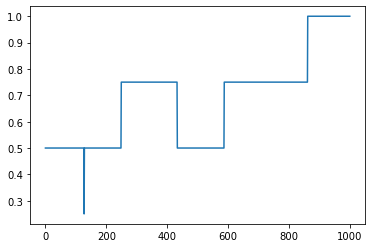

In [839]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

class Model(nn.Module): 
    def __init__(self): 
        super(Model, self).__init__()
        self.layer1 = nn.Sequential( 
            nn.Linear(2, 10),
            nn.Sigmoid(),
            nn.Linear(10, 1),
            nn.Sigmoid(),    #반드시 sigmodi 여야 함 binary loss일 경우 
        )
        
    def forward(self, x):
        x = self.layer1(x)
        return x  

model = Model()

hist = train(model, X, y, epochs= 1000, loss='binary', opt='adam', lr=0.001)

plt.plot(hist["accuracy"])